## Using VaR and CVaR as a risk management tool for a portfolio of ETFs

[*********************100%%**********************]  7 of 7 completed

Parametric VaR at 95.0% confidence level: -0.94%
Conditional VaR (CVaR) at 95.0% confidence level: 1.18%


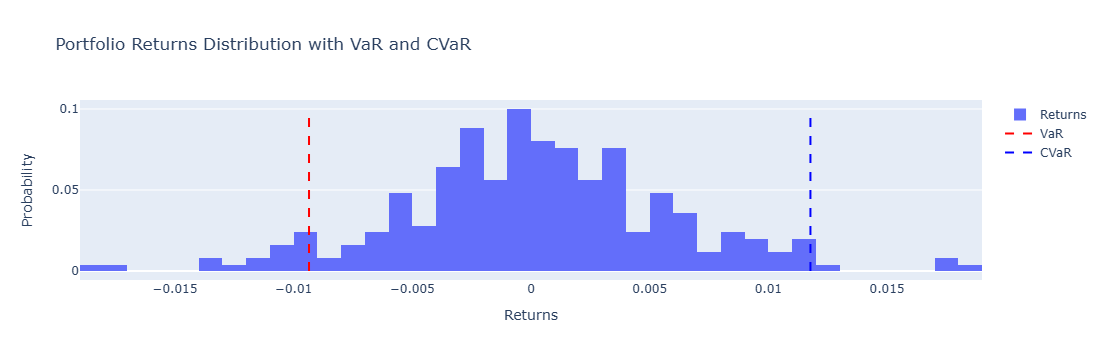

In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Portfolio weights (example: equally weighted)
weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio returns
portfolio_returns = returns.dot(weights)

# Calculate mean and standard deviation of portfolio returns
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate VaR using the parametric method
VaR = norm.ppf(alpha, mean_return, std_return)

# Calculate CVaR (also known as Expected Shortfall)
CVaR = alpha**-1 * norm.pdf(norm.ppf(alpha)) * std_return - mean_return

# Plotting the distribution of returns
fig = go.Figure()

# Histogram of returns
fig.add_trace(go.Histogram(x=portfolio_returns, nbinsx=50, name='Returns', histnorm='probability'))

# VaR line
fig.add_trace(go.Scatter(x=[VaR, VaR], y=[0, 0.1], mode='lines', name='VaR', line=dict(color='red', dash='dash')))

# CVaR line
fig.add_trace(go.Scatter(x=[CVaR, CVaR], y=[0, 0.1], mode='lines', name='CVaR', line=dict(color='blue', dash='dash')))

fig.update_layout(title='Portfolio Returns Distribution with VaR and CVaR',
                  xaxis_title='Returns',
                  yaxis_title='Probability')

print(f"Parametric VaR at {confidence_level*100}% confidence level: {VaR:.2%}")
print(f"Conditional VaR (CVaR) at {confidence_level*100}% confidence level: {CVaR:.2%}")

fig.show()

### The same but using log normal returns 

[*********************100%%**********************]  7 of 7 completed

Parametric VaR at 95.0% confidence level: -0.94%
Conditional VaR (CVaR) at 95.0% confidence level: 1.18%


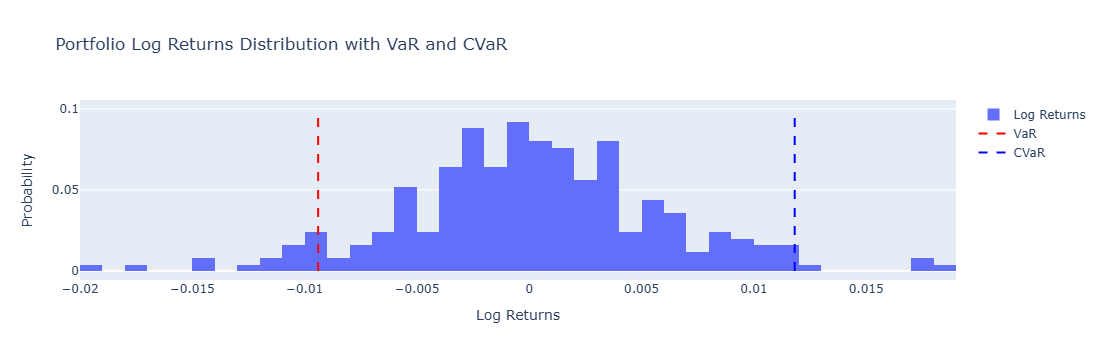

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Adj Close']

# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Portfolio weights (example: equally weighted)
weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio log returns
portfolio_log_returns = log_returns.dot(weights)

# Calculate mean and standard deviation of portfolio log returns
mean_log_return = portfolio_log_returns.mean()
std_log_return = portfolio_log_returns.std()

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate VaR using the parametric method with log-normal returns
VaR = norm.ppf(alpha, mean_log_return, std_log_return)

# Calculate CVaR (also known as Expected Shortfall) with log-normal returns
CVaR = alpha**-1 * norm.pdf(norm.ppf(alpha)) * std_log_return - mean_log_return

# Plotting the distribution of log returns
fig = go.Figure()

# Histogram of log returns
fig.add_trace(go.Histogram(x=portfolio_log_returns, nbinsx=50, name='Log Returns', histnorm='probability'))

# VaR line
fig.add_trace(go.Scatter(x=[VaR, VaR], y=[0, 0.1], mode='lines', name='VaR', line=dict(color='red', dash='dash')))

# CVaR line
fig.add_trace(go.Scatter(x=[CVaR, CVaR], y=[0, 0.1], mode='lines', name='CVaR', line=dict(color='blue', dash='dash')))

fig.update_layout(title='Portfolio Log Returns Distribution with VaR and CVaR',
                  xaxis_title='Log Returns',
                  yaxis_title='Probability')

print(f"Parametric VaR at {confidence_level*100}% confidence level: {VaR:.2%}")
print(f"Conditional VaR (CVaR) at {confidence_level*100}% confidence level: {CVaR:.2%}")

fig.show()

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed


Parametric VaR at 95.0% confidence level: -0.94%
Conditional VaR (CVaR) at 95.0% confidence level: 1.18%


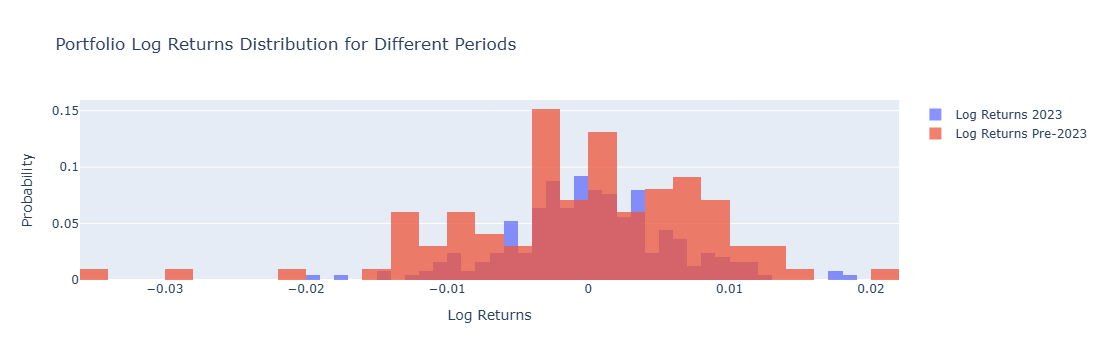

In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# List of tickers
tickers = ['FRCH.L', 'IIND.L', 'BBDS.L', 'BCOG.L', 'VWRL.L', 'IUSA.L', 'GLDW.L']

# Fetch data for different periods
data_2023 = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Adj Close']
data_pre_2023 = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate daily log returns
log_returns_2023 = np.log(data_2023 / data_2023.shift(1)).dropna()
log_returns_pre_2023 = np.log(data_pre_2023 / data_pre_2023.shift(1)).dropna()

# Portfolio weights (example: equally weighted)
weights = np.array([1/len(tickers)] * len(tickers))

# Calculate portfolio log returns
portfolio_log_returns_2023 = log_returns_2023.dot(weights)
portfolio_log_returns_pre_2023 = log_returns_pre_2023.dot(weights)

# Plotting the distribution of log returns for different periods
fig = go.Figure()

# Histogram of log returns for 2023
fig.add_trace(go.Histogram(x=portfolio_log_returns_2023, nbinsx=50, name='Log Returns 2023', histnorm='probability', opacity=0.75))

# Histogram of log returns for pre-2023
fig.add_trace(go.Histogram(x=portfolio_log_returns_pre_2023, nbinsx=50, name='Log Returns Pre-2023', histnorm='probability', opacity=0.75))

fig.update_layout(title='Portfolio Log Returns Distribution for Different Periods',
                  xaxis_title='Log Returns',
                  yaxis_title='Probability',
                  barmode='overlay')

print(f"Parametric VaR at {confidence_level*100}% confidence level: {VaR:.2%}")
print(f"Conditional VaR (CVaR) at {confidence_level*100}% confidence level: {CVaR:.2%}")

fig.show()